# Implementasi Algoritma C4.5 untuk Memprediksi Tingkat Risiko Penyebaran COVID-19 di Indonesia

**Tugas Mata Kuliah Kecerdasan Bisnis**

---

## Deskripsi Proyek

Proyek ini mengimplementasikan algoritma C4.5 (Decision Tree) untuk memprediksi tingkat risiko penyebaran COVID-19 di Indonesia berdasarkan data historis yang tersedia. Dataset yang digunakan adalah `covid_19_indonesia.csv` yang berisi informasi komprehensif tentang penyebaran COVID-19 di berbagai wilayah Indonesia.

### Tujuan:

1. Menganalisis data COVID-19 Indonesia
2. Memilih fitur yang relevan untuk prediksi
3. Mengimplementasikan algoritma C4.5 untuk klasifikasi tingkat risiko
4. Memvisualisasikan hasil prediksi dalam bentuk peta Indonesia
5. Evaluasi performa model

### Metodologi:

- Eksplorasi data dan analisis statistik deskriptif
- Seleksi fitur berdasarkan relevansi domain
- Feature engineering untuk menciptakan label risiko
- Implementasi algoritma C4.5 menggunakan DecisionTreeClassifier
- Evaluasi model dan visualisasi hasil


## 1. Setup Virtual Environment dan Library

Setup environment dan library diperlukan untuk analisis data, machine learning, dan visualisasi.


In [1]:
import sys
print(f"Python version: {sys.version}")
print("Virtual environment siap digunakan!")

Python version: 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]
Virtual environment siap digunakan!


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime
import os
import joblib

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Semua library berhasil diimport!")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

Semua library berhasil diimport!
Pandas version: 2.3.0
Numpy version: 2.2.6
Scikit-learn version: 1.7.0
Matplotlib version: 3.10.3
Seaborn version: 0.13.2


## 2. Load Dataset dan Eksplorasi Awal

Memuat dataset `covid_19_indonesia.csv` dan melakukan eksplorasi awal untuk memahami struktur dan konten data.


In [3]:
try:
    df = pd.read_csv('covid_19_indonesia.csv')
    print("Dataset berhasil dimuat!")
    print(f"Ukuran dataset: {df.shape}")
    print(f"Jumlah baris: {df.shape[0]:,}")
    print(f"Jumlah kolom: {df.shape[1]}")
except FileNotFoundError:
    print("File covid_19_indonesia.csv tidak ditemukan!")
    print("Pastikan file berada di direktori yang sama dengan notebook ini.")
except Exception as e:
    print(f"Error saat memuat dataset: {e}")

# Tampilkan beberapa baris pertama
print("\nSAMPLE DATA (5 baris pertama):")
df.head()

Dataset berhasil dimuat!
Ukuran dataset: (31822, 38)
Jumlah baris: 31,822
Jumlah kolom: 38

SAMPLE DATA (5 baris pertama):


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [4]:
# Eksplorasi struktur data
print("Struktur Data:\n")
df.info()

# Analisis missing values
print("\nMissing Values:\n")

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percent', ascending=False)
print(missing_df)

# Statistik deskriptif
print("\nStatistik Deskriptif:\n")
df.describe()

Struktur Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


## 3. Seleksi Fitur dan Preprocessing

Berdasarkan analisis data dan relevansi untuk prediksi risiko COVID-19, kita akan memilih kolom yang informatif dan melakukan preprocessing yang diperlukan.


In [5]:
# Seleksi kolom yang relevan untuk analisis
print("Seleksi Fitur:\n")

selected_columns = [
    'Date',                    # Temporal: Waktu penting untuk tren penyebaran
    'Province',                # Geografis: Lokasi untuk analisis regional
    'New Cases',               # Target utama: Kasus baru harian
    'New Deaths',              # Indikator keparahan
    'Total Cases',             # Kumulatif kasus
    'Total Deaths',            # Kumulatif kematian
    'Population',              # Demografis: Basis perhitungan per kapita
    'Population Density',      # Demografis: Kepadatan mempengaruhi penyebaran
    'Longitude',               # Geografis: Koordinat untuk pemetaan
    'Latitude',                # Geografis: Koordinat untuk pemetaan
    'New Cases per Million',   # Normalized metric
    'Total Cases per Million', # Normalized metric
    'Case Fatality Rate'       # Tingkat kematian
]

# Kolom yang TIDAK DIGUNAKAN dengan alasannya
excluded_columns = [col for col in df.columns if col not in selected_columns]

# Kategorisasi kolom yang tidak digunakan
admin_codes = ['Location ISO Code', 'Country', 'Continent', 'Island', 'Time Zone']
admin_data = ['City or Regency', 'Special Status', 'Total Regencies', 'Total Cities', 
              'Total Districts', 'Total Urban Villages', 'Total Rural Villages', 'Area (km2)']
redundant_metrics = ['New Recovered', 'New Active Cases', 'Total Recovered', 'Total Active Cases',
                     'New Deaths per Million', 'Total Deaths per Million', 'Total Deaths per 100rb',
                     'Case Recovered Rate', 'Growth Factor of New Cases', 'Growth Factor of New Deaths']
location_level = ['Location Level', 'Location']

# Tampilkan ringkasan kolom yang digunakan
print("KOLOM YANG DIGUNAKAN:")
print("-" * 40)
for i, col in enumerate(selected_columns, 1):
    print(f"{i:2d}. {col}")
print(f"\nTotal kolom yang digunakan: {len(selected_columns)} dari {len(df.columns)} kolom")

# Buat dataset dengan kolom terpilih
df_selected = df[selected_columns].copy()
print(f"\nDataset dengan kolom terpilih berhasil dibuat!")
print(f"Shape dataset yang digunakan: {df_selected.shape}")

Seleksi Fitur:

KOLOM YANG DIGUNAKAN:
----------------------------------------
 1. Date
 2. Province
 3. New Cases
 4. New Deaths
 5. Total Cases
 6. Total Deaths
 7. Population
 8. Population Density
 9. Longitude
10. Latitude
11. New Cases per Million
12. Total Cases per Million
13. Case Fatality Rate

Total kolom yang digunakan: 13 dari 38 kolom

Dataset dengan kolom terpilih berhasil dibuat!
Shape dataset yang digunakan: (31822, 13)


In [6]:
print("Data Preprocessing:\n")
print("Missing values sebelum pembersihan:")
print(df_selected.isnull().sum())

# Copy dataset untuk preprocessing
df_clean = df_selected.copy()

# 1. Konversi data percentage string ke numeric
percentage_cols = ['Case Fatality Rate']
for col in percentage_cols:
    if col in df_clean.columns:
        # Konversi dari string percentage ke float
        df_clean[col] = df_clean[col].astype(str).str.replace('%', '').astype(float)

# 2. Konversi tipe data untuk kolom numerik
numeric_cols = ['New Cases', 'New Deaths', 'Total Cases', 'Total Deaths', 
                'Population', 'Population Density', 'New Cases per Million', 
                'Total Cases per Million', 'Case Fatality Rate']

for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 3. Konversi tanggal
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# 4. Handle nilai negatif (tidak logis untuk data COVID)
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].clip(lower=0)  # Tidak boleh negatif

# 5. Hapus semua baris yang memiliki nilai null di kolom manapun
print(f"\nJumlah data sebelum menghapus missing values: {len(df_clean)} baris")
df_clean = df_clean.dropna()
print(f"Jumlah data setelah menghapus missing values: {len(df_clean)} baris")
print(f"Jumlah baris yang dihapus: {len(df_selected) - len(df_clean)} baris")

print("\nMissing values setelah preprocessing:")
print(df_clean.isnull().sum())
print(f"\nJumlah data setelah preprocessing: {len(df_clean)} baris")

# 6. Membuat fitur tambahan (growth rates)
df_clean['Cases_Growth_Rate'] = df_clean.groupby('Province')['New Cases'].pct_change().fillna(0)
df_clean['Deaths_Growth_Rate'] = df_clean.groupby('Province')['New Deaths'].pct_change().fillna(0)

# 7. Handle infinite values di growth rates
for col in ['Cases_Growth_Rate', 'Deaths_Growth_Rate']:
    df_clean[col] = df_clean[col].replace([np.inf, -np.inf], 0)

# Definisi fitur yang akan digunakan untuk modeling
model_features = ['New Cases per Million', 'Total Cases per Million', 'Case Fatality Rate',
                 'Population Density', 'Cases_Growth_Rate', 'Deaths_Growth_Rate']

print("\nFitur yang akan digunakan untuk model:")
for i, feature in enumerate(model_features, 1):
    print(f"{i}. {feature}")

Data Preprocessing:

Missing values sebelum pembersihan:
Date                         0
Province                   929
New Cases                    0
New Deaths                   0
Total Cases                  0
Total Deaths                 0
Population                   0
Population Density           0
Longitude                    0
Latitude                     0
New Cases per Million        0
Total Cases per Million      0
Case Fatality Rate           0
dtype: int64

Jumlah data sebelum menghapus missing values: 31822 baris
Jumlah data setelah menghapus missing values: 30893 baris
Jumlah baris yang dihapus: 929 baris

Missing values setelah preprocessing:
Date                       0
Province                   0
New Cases                  0
New Deaths                 0
Total Cases                0
Total Deaths               0
Population                 0
Population Density         0
Longitude                  0
Latitude                   0
New Cases per Million      0
Total Cases per

## 4. Feature Engineering dan Kategorisasi Risiko

Membuat fitur Risk Score dan kategorisasi tingkat risiko menggunakan metodologi yang sistematis.


Feature Engineering dan Kategorisasi Risiko:

STEP 1: Analisis Korelasi untuk Menentukan Bobot Optimal
--------------------------------------------------
Matriks Korelasi Antar Fitur:
                       New Cases per Million  Case Fatality Rate  \
New Cases per Million               1.000000           -0.042008   
Case Fatality Rate                 -0.042008            1.000000   
Cases_Growth_Rate                   0.017829           -0.006956   
Deaths_Growth_Rate                  0.049323           -0.005739   
Population Density                  0.267045            0.011616   

                       Cases_Growth_Rate  Deaths_Growth_Rate  \
New Cases per Million           0.017829            0.049323   
Case Fatality Rate             -0.006956           -0.005739   
Cases_Growth_Rate               1.000000            0.007505   
Deaths_Growth_Rate              0.007505            1.000000   
Population Density             -0.008765            0.019419   

                      

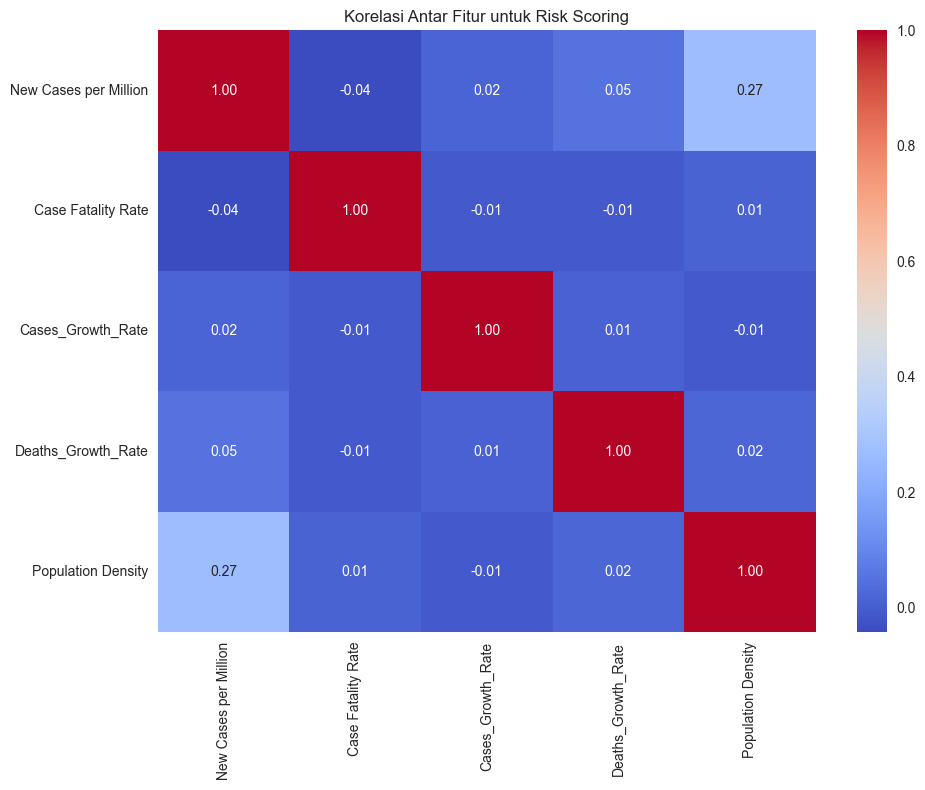


STEP 2: Pembobotan dan Normalisasi
--------------------------------------------------
Perbandingan Bobot:
                       Berbasis Standar Deviasi  Berbasis Domain Knowledge  \
New Cases per Million                  0.026233                       0.30   
Case Fatality Rate                     0.005104                       0.25   
Cases_Growth_Rate                      0.000921                       0.20   
Deaths_Growth_Rate                     0.000450                       0.15   
Population Density                     0.967292                       0.10   

                       Berbasis Korelasi  
New Cases per Million           0.726636  
Case Fatality Rate              0.030525  
Cases_Growth_Rate               0.012955  
Deaths_Growth_Rate              0.035840  
Population Density              0.194044  

STEP 3: Hitung Risk Score dengan Berbagai Metode Pembobotan
--------------------------------------------------


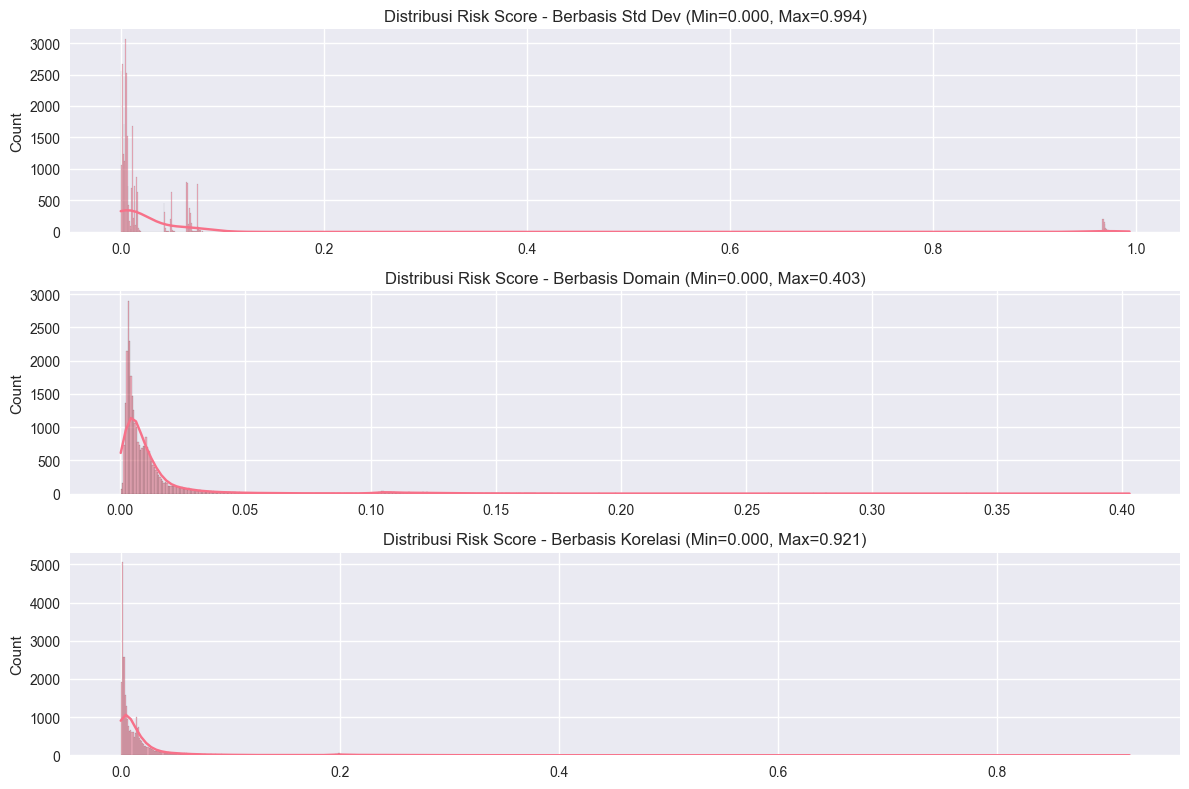


STEP 4: Kategorisasi Risk Level dengan K-means
--------------------------------------------------


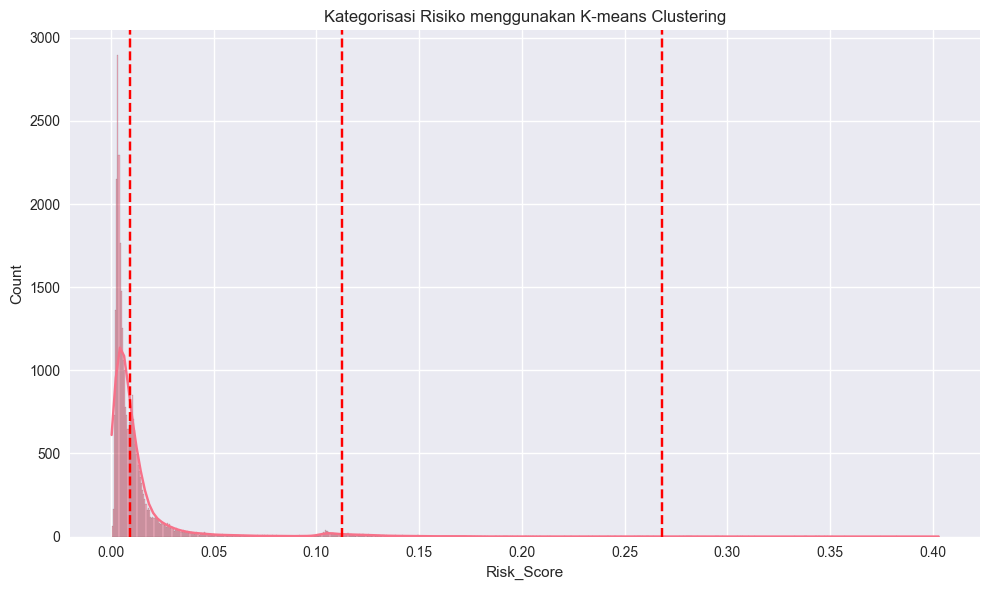


Distribusi tingkat risiko (K-means clustering):
Risk_Level
Rendah    29524
Sedang     1293
Tinggi       76
Name: count, dtype: int64
Persentase: Risk_Level
Rendah    95.568575
Sedang     4.185414
Tinggi     0.246010
Name: count, dtype: float64

Statistik Risk Score per kategori:
              count      mean       std       min       25%       50%  \
Risk_Level                                                              
Rendah      29524.0  0.009100  0.008555  0.000303  0.003602  0.006093   
Sedang       1293.0  0.112242  0.025477  0.060787  0.102971  0.110718   
Tinggi         76.0  0.268141  0.055882  0.190963  0.219002  0.260043   

                 75%       max  
Risk_Level                      
Rendah      0.011371  0.060562  
Sedang      0.125417  0.189158  
Tinggi      0.306645  0.402925  

Interpretasi bobot fitur yang digunakan:
New Cases per Million: 0.30 (30%)
Case Fatality Rate: 0.25 (25%)
Cases_Growth_Rate: 0.20 (20%)
Deaths_Growth_Rate: 0.15 (15%)
Population Density: 

In [7]:
# Feature Engineering: Membuat label risiko
print("Feature Engineering dan Kategorisasi Risiko:\n")

# Daftar fitur yang akan digunakan untuk scoring
features_for_scoring = ['New Cases per Million', 'Case Fatality Rate', 
                        'Cases_Growth_Rate', 'Deaths_Growth_Rate', 'Population Density']

print("STEP 1: Analisis Korelasi untuk Menentukan Bobot Optimal")
print("-" * 50)

# Analisis korelasi antar fitur
corr_matrix = df_clean[features_for_scoring].corr()
print("Matriks Korelasi Antar Fitur:")
print(corr_matrix)

# Visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur untuk Risk Scoring')
plt.tight_layout()
plt.show()

print("\nSTEP 2: Pembobotan dan Normalisasi")
print("-" * 50)

# Variasi bobot berdasarkan standar deviasi fitur
std_weights = df_clean[features_for_scoring].std()
std_weights = std_weights / std_weights.sum()  # Normalisasi sehingga total = 1

# Bobot manual berdasarkan domain knowledge
domain_weights = pd.Series({
    'New Cases per Million': 0.3, 
    'Case Fatality Rate': 0.25,
    'Cases_Growth_Rate': 0.2,
    'Deaths_Growth_Rate': 0.15,
    'Population Density': 0.1
})

# Bobot berbasis korelasi dengan metrik utama (New Cases per Million)
correlation_weights = corr_matrix['New Cases per Million'].abs()
correlation_weights = correlation_weights / correlation_weights.sum()  # Normalisasi

print("Perbandingan Bobot:")
weights_df = pd.DataFrame({
    'Berbasis Standar Deviasi': std_weights,
    'Berbasis Domain Knowledge': domain_weights,
    'Berbasis Korelasi': correlation_weights
})
print(weights_df)

# Normalisasi data untuk scoring
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(df_clean[features_for_scoring].fillna(0))
features_df = pd.DataFrame(features_normalized, columns=features_for_scoring)

print("\nSTEP 3: Hitung Risk Score dengan Berbagai Metode Pembobotan")
print("-" * 50)

# Hitung risk score dengan 3 metode berbeda
risk_score_std = np.dot(features_normalized, std_weights)
risk_score_domain = np.dot(features_normalized, domain_weights)
risk_score_corr = np.dot(features_normalized, correlation_weights)

# Bandingkan distribusi risk scores
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.histplot(risk_score_std, kde=True)
plt.title(f'Distribusi Risk Score - Berbasis Std Dev (Min={risk_score_std.min():.3f}, Max={risk_score_std.max():.3f})')

plt.subplot(3, 1, 2)
sns.histplot(risk_score_domain, kde=True)
plt.title(f'Distribusi Risk Score - Berbasis Domain (Min={risk_score_domain.min():.3f}, Max={risk_score_domain.max():.3f})')

plt.subplot(3, 1, 3)
sns.histplot(risk_score_corr, kde=True)
plt.title(f'Distribusi Risk Score - Berbasis Korelasi (Min={risk_score_corr.min():.3f}, Max={risk_score_corr.max():.3f})')

plt.tight_layout()
plt.show()

# Pilih metode bobot yang optimal (domain knowledge)
selected_weights = domain_weights
df_clean['Risk_Score'] = risk_score_domain

print("\nSTEP 4: Kategorisasi Risk Level dengan K-means")
print("-" * 50)

# K-means clustering untuk kategorisasi risiko
X_kmeans = df_clean['Risk_Score'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_kmeans)

# Map cluster indexes ke labels berdasarkan centroid values
centroids = kmeans.cluster_centers_.flatten()
cluster_to_label = {
    np.argmin(centroids): 'Rendah',
    np.argsort(centroids)[1]: 'Sedang',
    np.argmax(centroids): 'Tinggi'
}
kmeans_labels = pd.Series([cluster_to_label[c] for c in clusters], index=df_clean.index)

# Visualisasi pengelompokan K-means
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['Risk_Score'], kde=True)
for centroid in centroids:
    plt.axvline(centroid, color='r', linestyle='--')
plt.title('Kategorisasi Risiko menggunakan K-means Clustering')
plt.tight_layout()
plt.show()

# Tetapkan kategori risiko
df_clean['Risk_Level'] = kmeans_labels

print("\nDistribusi tingkat risiko (K-means clustering):")
risk_distribution = df_clean['Risk_Level'].value_counts()
print(risk_distribution)
print(f"Persentase: {risk_distribution / len(df_clean) * 100}")

print("\nStatistik Risk Score per kategori:")
print(df_clean.groupby('Risk_Level')['Risk_Score'].describe())

# Interpretasi bobot fitur
print("\nInterpretasi bobot fitur yang digunakan:")
for feature, weight in selected_weights.items():
    print(f"{feature}: {weight:.2f} ({weight*100:.0f}%)")

# Simpan centroids untuk referensi
kmeans_centroids = {
    'Rendah': centroids[list(cluster_to_label.keys())[list(cluster_to_label.values()).index('Rendah')]],
    'Sedang': centroids[list(cluster_to_label.keys())[list(cluster_to_label.values()).index('Sedang')]],
    'Tinggi': centroids[list(cluster_to_label.keys())[list(cluster_to_label.values()).index('Tinggi')]]
}
print("\nNilai centroid untuk tiap kategori:")
for category, value in kmeans_centroids.items():
    print(f"{category}: {value:.4f}")

## 5. Implementasi Algoritma C4.5

Implementasi algoritma C4.5 menggunakan DecisionTreeClassifier dari scikit-learn tanpa menggunakan Risk_Score sebagai fitur untuk menghindari data leakage.


In [8]:
# Persiapan data untuk machine learning
print("Persiapan Data untuk Model C4.5:\n")

# 1. Split data menjadi training dan testing (80:20)
X = df_clean[model_features].fillna(0)
y = df_clean['Risk_Level']

print(f"Fitur yang digunakan untuk model C4.5:")
for i, col in enumerate(model_features, 1):
    print(f"{i}. {col}")
print("\nCATPAN PENTING: Risk_Score TIDAK dimasukkan sebagai fitur untuk menghindari data leakage!")

print(f"\nShape data: X = {X.shape}, y = {y.shape}")
print(f"Distribusi label:")
print(y.value_counts())

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData training: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Data testing: X_test = {X_test.shape}, y_test = {y_test.shape}")

# 3. Training model C4.5
print("\nTraining Model C4.5:")
c45_model = DecisionTreeClassifier(
    criterion='entropy',  # Menggunakan entropy (information gain) seperti C4.5
    max_depth=5,          # Batasi kedalaman untuk menghindari overfitting
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

# 4. Validasi silang untuk melihat stabilitas model
cv_scores = cross_val_score(c45_model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 5. Fit model dengan semua data training
c45_model.fit(X_train, y_train)

# 6. Prediksi pada data testing
y_pred = c45_model.predict(X_test)
print("\nModel C4.5 training selesai!")

Persiapan Data untuk Model C4.5:

Fitur yang digunakan untuk model C4.5:
1. New Cases per Million
2. Total Cases per Million
3. Case Fatality Rate
4. Population Density
5. Cases_Growth_Rate
6. Deaths_Growth_Rate

CATPAN PENTING: Risk_Score TIDAK dimasukkan sebagai fitur untuk menghindari data leakage!

Shape data: X = (30893, 6), y = (30893,)
Distribusi label:
Risk_Level
Rendah    29524
Sedang     1293
Tinggi       76
Name: count, dtype: int64

Data training: X_train = (24714, 6), y_train = (24714,)
Data testing: X_test = (6179, 6), y_test = (6179,)

Training Model C4.5:
Cross-validation scores: [0.99627771 0.99902897 0.99708691 0.99902881 0.99967627]
Mean CV accuracy: 0.9982 ± 0.0013

Model C4.5 training selesai!
Cross-validation scores: [0.99627771 0.99902897 0.99708691 0.99902881 0.99967627]
Mean CV accuracy: 0.9982 ± 0.0013

Model C4.5 training selesai!


Evaluasi Model C4.5:

Akurasi pada data testing: 0.9989 (99.89%)

Classification Report:
              precision    recall  f1-score   support

      Rendah       1.00      1.00      1.00      5905
      Sedang       1.00      0.98      0.99       259
      Tinggi       1.00      0.93      0.97        15

    accuracy                           1.00      6179
   macro avg       1.00      0.97      0.98      6179
weighted avg       1.00      1.00      1.00      6179


Confusion Matrix:
[[5905    0    0]
 [   6  253    0]
 [   0    1   14]]


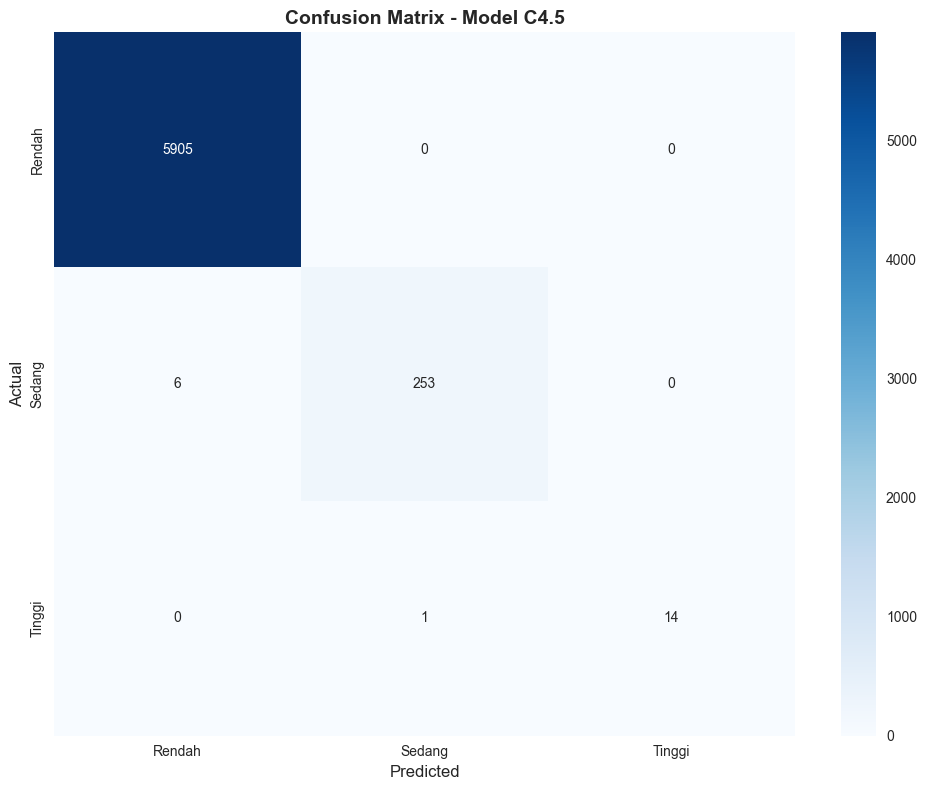

In [9]:
# Evaluasi model
print("Evaluasi Model C4.5:\n")

# 1. Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada data testing: {accuracy:.4f} ({accuracy*100:.2f}%)")

# 2. Classification Report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

# 4. Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Rendah', 'Sedang', 'Tinggi'],
            yticklabels=['Rendah', 'Sedang', 'Tinggi'])
plt.title('Confusion Matrix - Model C4.5', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

Visualisasi Model C4.5:



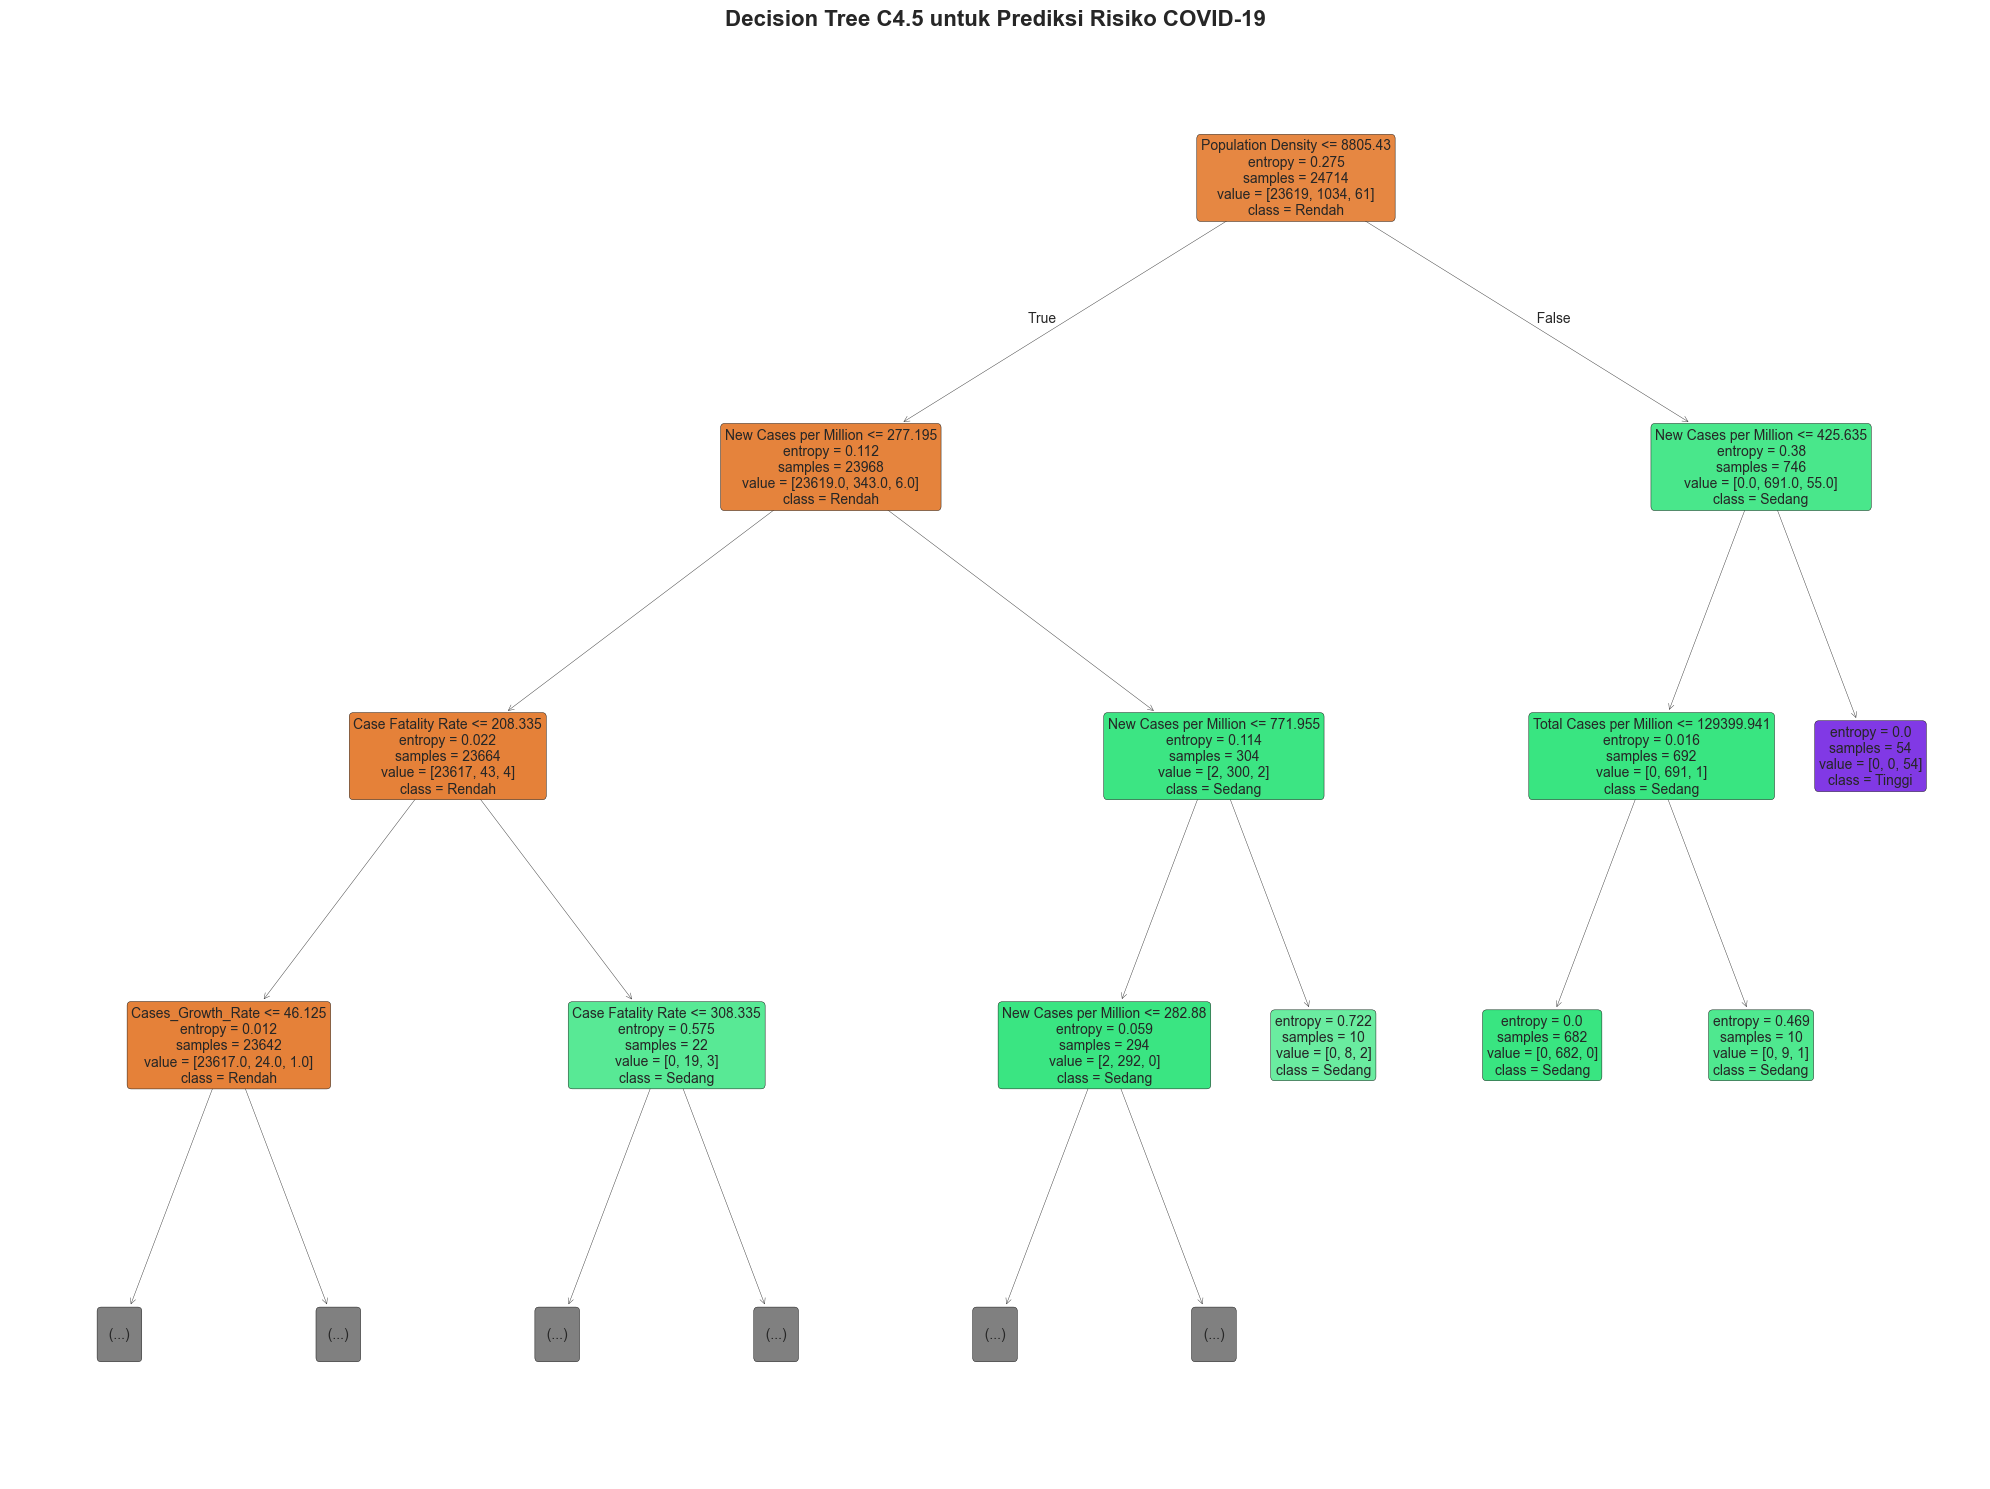

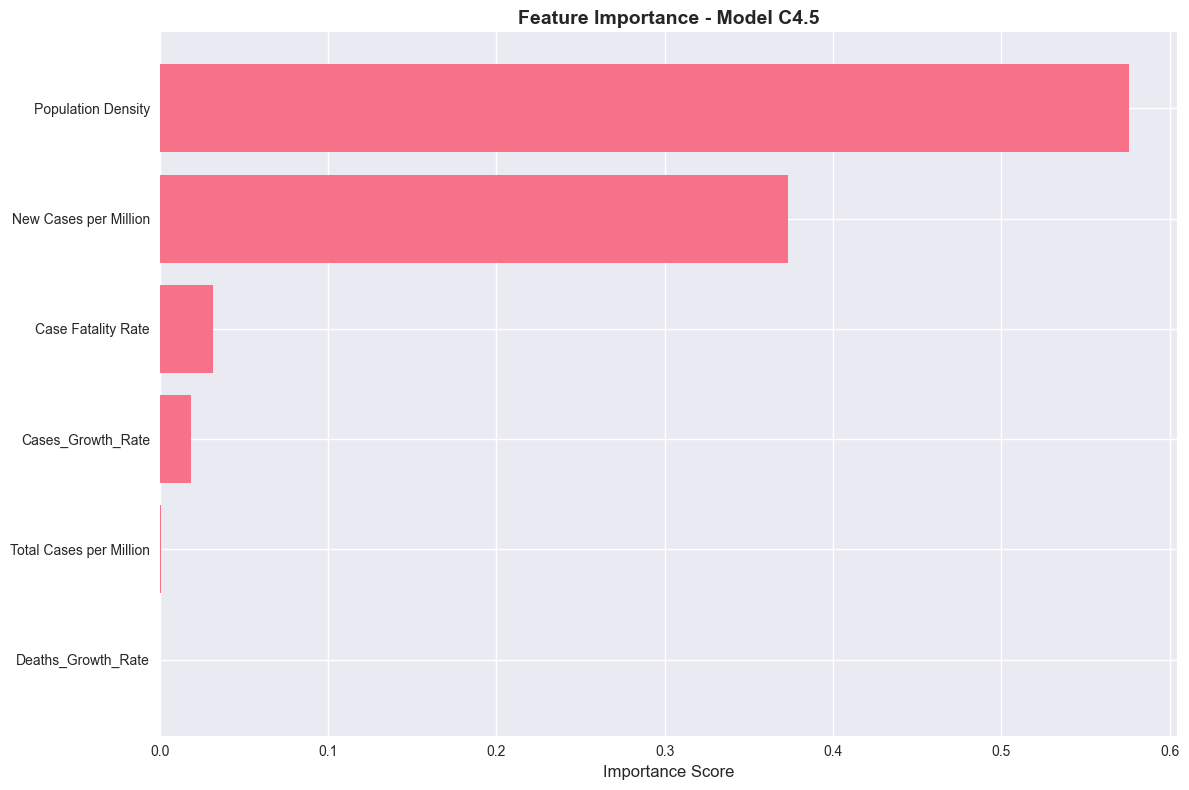

Akurasi model pada seluruh dataset: 0.9991 (99.91%)


In [10]:
# Visualisasi model dan feature importance
print("Visualisasi Model C4.5:\n")

# 1. Visualisasi pohon keputusan (dibatasi kedalaman untuk readability)
plt.figure(figsize=(20, 15))
plot_tree(c45_model, 
          feature_names=model_features,
          class_names=['Rendah', 'Sedang', 'Tinggi'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)  # Tampilkan hanya 3 level teratas untuk readability
plt.title('Decision Tree C4.5 untuk Prediksi Risiko COVID-19', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Visualisasi feature importance
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': model_features,
    'Importance': c45_model.feature_importances_
}).sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance - Model C4.5', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Prediksi untuk seluruh dataset
df_clean['Predicted_Risk'] = c45_model.predict(X)

# 4. Evaluasi performa pada seluruh dataset
overall_accuracy = accuracy_score(df_clean['Risk_Level'], df_clean['Predicted_Risk'])
print(f"Akurasi model pada seluruh dataset: {overall_accuracy:.4f} ({overall_accuracy*100:.2f}%)")

## 6. Pemetaan Risiko COVID-19 di Indonesia

Membuat visualisasi peta sebaran risiko COVID-19 di Indonesia menggunakan Folium.


In [11]:
# Agregasi data per provinsi untuk visualisasi peta
print("AGREGASI DATA PER PROVINSI:")
print("="*50)

# Ambil data terbaru per provinsi
df_latest = df_clean.dropna(subset=['Province']).loc[
    df_clean.dropna(subset=['Province']).groupby('Province')['Date'].idxmax()
].copy()

print(f"Data yang digunakan untuk peta: {len(df_latest)} provinsi")
print(f"Rentang tanggal: {df_latest['Date'].min()} - {df_latest['Date'].max()}")

# Mapping warna untuk tingkat risiko
risk_colors = {
    'Rendah': 'green',
    'Sedang': 'orange', 
    'Tinggi': 'red'
}

predicted_risk_colors = {
    'Rendah': 'lightgreen',
    'Sedang': 'yellow',
    'Tinggi': 'lightcoral'
}

print(f"\nDistribusi risiko aktual (per provinsi):")
print(df_latest['Risk_Level'].value_counts())
print(f"\nDistribusi risiko prediksi (per provinsi):")
print(df_latest['Predicted_Risk'].value_counts())

AGREGASI DATA PER PROVINSI:
Data yang digunakan untuk peta: 34 provinsi
Rentang tanggal: 2022-09-14 00:00:00 - 2022-09-15 00:00:00

Distribusi risiko aktual (per provinsi):
Risk_Level
Rendah    33
Sedang     1
Name: count, dtype: int64

Distribusi risiko prediksi (per provinsi):
Predicted_Risk
Rendah    33
Sedang     1
Name: count, dtype: int64


In [12]:
# Membuat peta risiko aktual
print("Pemetaan Risiko Peta Aktual:\n")

# Center peta di Indonesia
center_lat = df_latest['Latitude'].mean()
center_lon = df_latest['Longitude'].mean()

# Buat peta
map_actual = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=5,
    tiles='OpenStreetMap'
)

# Tambahkan marker untuk setiap provinsi
for idx, row in df_latest.iterrows():
    color = risk_colors.get(row['Risk_Level'], 'gray')
    
    popup_text = f"""
    <b>{row['Province']}</b><br>
    Risiko Aktual: <b>{row['Risk_Level']}</b><br>
    Total Kasus: {row['Total Cases']:,.0f}<br>
    Total Kematian: {row['Total Deaths']:,.0f}<br>
    Kasus per Juta: {row['Total Cases per Million']:,.0f}<br>
    CFR: {row['Case Fatality Rate']:.2f}%<br>
    Risk Score: {row['Risk_Score']:.4f}
    """
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=max(8, min(25, row['Total Cases per Million'] / 1000)),
        popup=folium.Popup(popup_text, max_width=300),
        color='black',
        fillColor=color,
        fillOpacity=0.8,
        weight=2
    ).add_to(map_actual)

# Tambahkan legend
legend_html = '''
<div style="position: fixed; 
     top: 10px; right: 10px; width: 150px; height: 150px; 
     background-color: white; border:2px solid grey; z-index:9999; 
     font-size:14px; padding: 10px">
<p><b>Tingkat Risiko Aktual</b></p>
<p><i class="fa fa-circle" style="color:green"></i> Rendah</p>
<p><i class="fa fa-circle" style="color:orange"></i> Sedang</p>
<p><i class="fa fa-circle" style="color:red"></i> Tinggi</p>
</div>
'''
map_actual.get_root().html.add_child(folium.Element(legend_html))

print("Peta risiko aktual berhasil dibuat!")
print("\nPeta Sebaran Risiko COVID-19 di Indonesia (Aktual):")
map_actual

Pemetaan Risiko Peta Aktual:

Peta risiko aktual berhasil dibuat!

Peta Sebaran Risiko COVID-19 di Indonesia (Aktual):


In [13]:
# Membuat peta risiko prediksi
print("Pemetaan Risiko Peta Prediksi:\n")

# Buat peta untuk prediksi
map_predicted = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=5,
    tiles='OpenStreetMap'
)

# Tambahkan marker untuk setiap provinsi
for idx, row in df_latest.iterrows():
    color = predicted_risk_colors.get(row['Predicted_Risk'], 'gray')
    
    # Indikator apakah prediksi benar
    match_icon = '✓' if row['Predicted_Risk'] == row['Risk_Level'] else '✗'
    match_style = 'color:green;font-weight:bold' if row['Predicted_Risk'] == row['Risk_Level'] else 'color:red;font-weight:bold'
    
    popup_text = f"""
    <b>{row['Province']}</b><br>
    Risiko Prediksi: <b>{row['Predicted_Risk']}</b><br>
    Risiko Aktual: <b>{row['Risk_Level']}</b><br>
    Match: <b style="{match_style}">{match_icon}</b><br>
    Total Kasus: {row['Total Cases']:,.0f}<br>
    Kasus per Juta: {row['Total Cases per Million']:,.0f}<br>
    CFR: {row['Case Fatality Rate']:.2f}%
    """
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=max(8, min(25, row['Total Cases per Million'] / 1000)),
        popup=folium.Popup(popup_text, max_width=300),
        color='black',
        fillColor=color,
        fillOpacity=0.8,
        weight=2
    ).add_to(map_predicted)

# Tambahkan legend
legend_predicted = '''
<div style="position: fixed; 
     top: 10px; right: 10px; width: 150px; height: 150px; 
     background-color: white; border:2px solid grey; z-index:9999; 
     font-size:14px; padding: 10px">
<p><b>Tingkat Risiko Prediksi</b></p>
<p><i class="fa fa-circle" style="color:lightgreen"></i> Rendah</p>
<p><i class="fa fa-circle" style="color:yellow"></i> Sedang</p>
<p><i class="fa fa-circle" style="color:lightcoral"></i> Tinggi</p>
</div>
'''
map_predicted.get_root().html.add_child(folium.Element(legend_predicted))

print("Peta risiko prediksi berhasil dibuat!")
print("\nPeta Sebaran Risiko COVID-19 di Indonesia (Prediksi):")
map_predicted

Pemetaan Risiko Peta Prediksi:

Peta risiko prediksi berhasil dibuat!

Peta Sebaran Risiko COVID-19 di Indonesia (Prediksi):


## 7. Analisis Tambahan

Analisis dan visualisasi tambahan untuk lebih memahami pola data dan performa model.


Korelasi Antar Fitur Model:



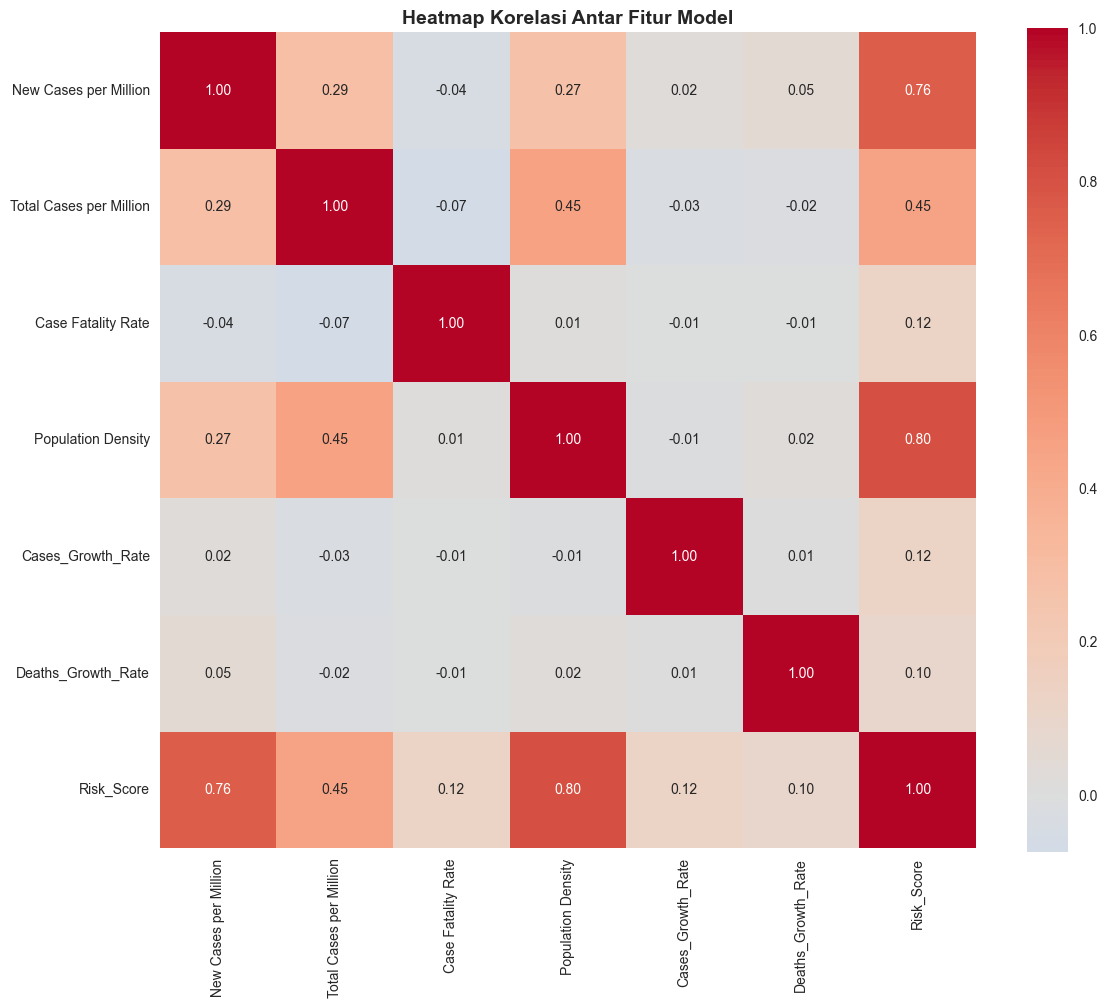

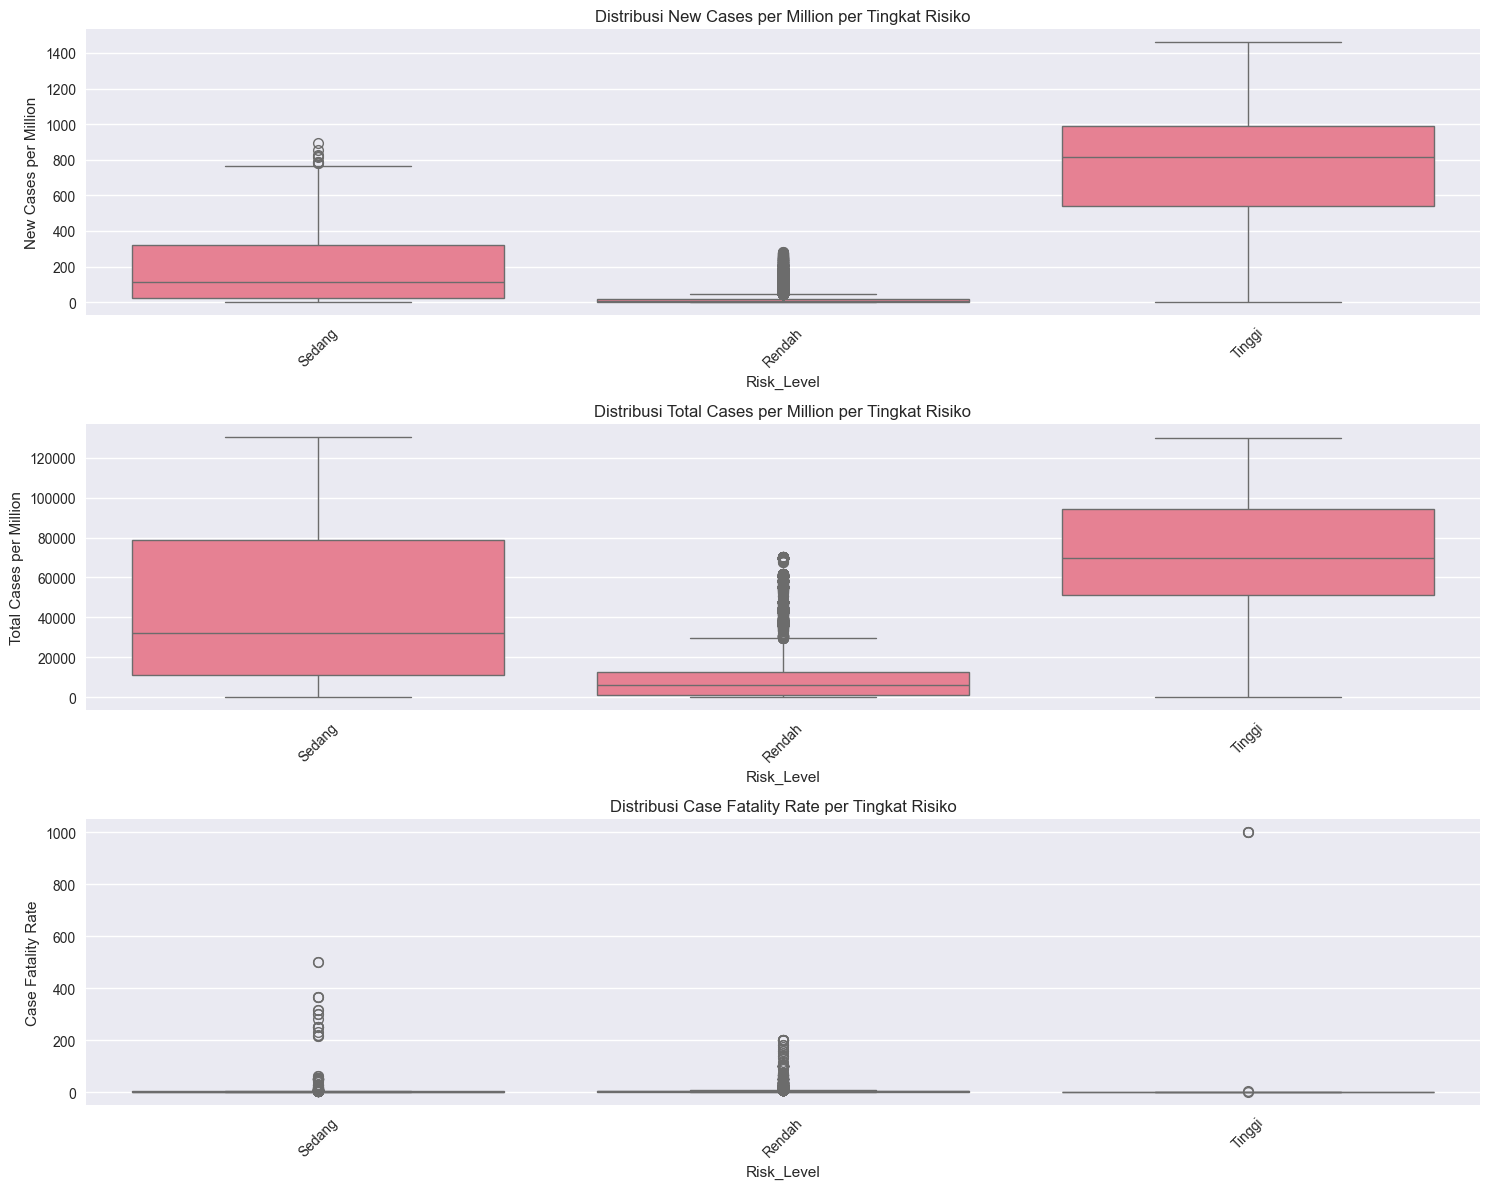

In [14]:
# Analisis korelasi antar fitur
print("Korelasi Antar Fitur Model:\n")

plt.figure(figsize=(12, 10))
correlation_matrix = df_clean[model_features + ['Risk_Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualisasi distribusi fitur berdasarkan tingkat risiko
feature_plots = min(3, len(model_features))
plt.figure(figsize=(15, 4 * feature_plots))

for i, feature in enumerate(model_features[:feature_plots]):
    plt.subplot(feature_plots, 1, i+1)
    sns.boxplot(x='Risk_Level', y=feature, data=df_clean)
    plt.title(f'Distribusi {feature} per Tingkat Risiko')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Analisis Distribusi Risk Score & Akurasi Model:



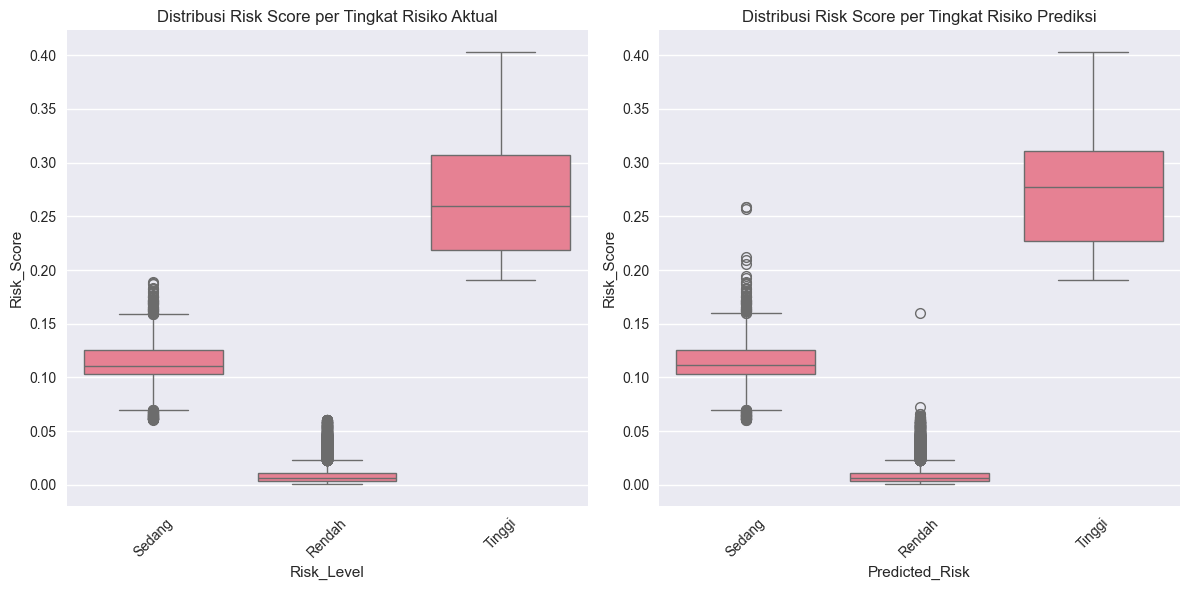

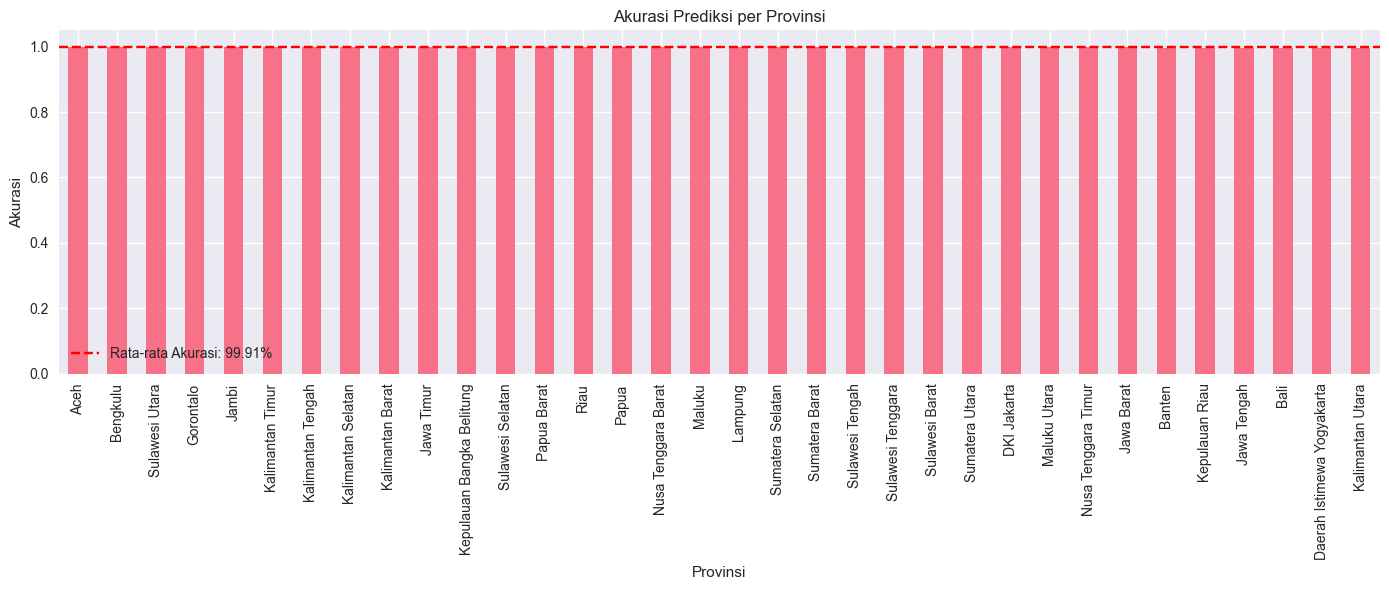

Provinsi dengan akurasi prediksi tertinggi:
Province
Aceh              1.0
Bengkulu          1.0
Sulawesi Utara    1.0
Gorontalo         1.0
Jambi             1.0
dtype: float64

Provinsi dengan akurasi prediksi terendah:
Province
Kepulauan Riau                0.996707
Jawa Tengah                   0.995662
Bali                          0.995647
Daerah Istimewa Yogyakarta    0.994530
Kalimantan Utara              0.994457
dtype: float64


In [15]:
# Analisis distribusi Risk Score berdasarkan tingkat risiko
print("Analisis Distribusi Risk Score & Akurasi Model:\n")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='Risk_Level', y='Risk_Score')
plt.title('Distribusi Risk Score per Tingkat Risiko Aktual')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Predicted_Risk', y='Risk_Score')
plt.title('Distribusi Risk Score per Tingkat Risiko Prediksi')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Analisis performa model per provinsi
province_accuracy = df_clean.groupby('Province').apply(
    lambda x: accuracy_score(x['Risk_Level'], x['Predicted_Risk'])
).sort_values(ascending=False)

plt.figure(figsize=(14, 6))
province_accuracy.plot(kind='bar')
plt.axhline(y=overall_accuracy, color='r', linestyle='--', 
           label=f'Rata-rata Akurasi: {overall_accuracy:.2%}')
plt.title('Akurasi Prediksi per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Akurasi')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Top 5 provinsi dengan akurasi tertinggi & terendah
print("Provinsi dengan akurasi prediksi tertinggi:")
print(province_accuracy.head(5))
print("\nProvinsi dengan akurasi prediksi terendah:")
print(province_accuracy.tail(5))

In [16]:
# Analisis prediksi vs aktual untuk provinsi
print("Perbandingan Prediksi vs Aktual (Per Provinsi):\n")

# Buat dataframe untuk perbandingan
comparison_df = df_latest[['Province', 'Risk_Level', 'Predicted_Risk', 'Risk_Score']].copy()
comparison_df['Match'] = comparison_df['Risk_Level'] == comparison_df['Predicted_Risk']

print(f"Tingkat akurasi prediksi: {comparison_df['Match'].mean():.2%}")
print(f"Provinsi dengan prediksi benar: {comparison_df['Match'].sum()} dari {len(comparison_df)}")

# Provinsi dengan prediksi salah (jika ada)
wrong_predictions = comparison_df[~comparison_df['Match']].copy()
if len(wrong_predictions) > 0:
    print(f"\nProvinsi dengan prediksi salah:")
    wrong_predictions_sorted = wrong_predictions.sort_values('Province')
    for idx, row in wrong_predictions_sorted.iterrows():
        print(f"- {row['Province']}: Aktual={row['Risk_Level']}, Prediksi={row['Predicted_Risk']} (Score={row['Risk_Score']:.3f})")
else:
    print("\nSemua prediksi benar!")
    
# Tampilkan hasil perbandingan lengkap untuk semua provinsi
print("\nHasil prediksi untuk semua provinsi (diurutkan berdasarkan provinsi):")
comparison_df_sorted = comparison_df.sort_values('Province')
comparison_df_sorted

Perbandingan Prediksi vs Aktual (Per Provinsi):

Tingkat akurasi prediksi: 100.00%
Provinsi dengan prediksi benar: 34 dari 34

Semua prediksi benar!

Hasil prediksi untuk semua provinsi (diurutkan berdasarkan provinsi):


,Province,Risk_Level,Predicted_Risk,Risk_Score,Match
31788,Aceh,Rendah,Rendah,0.006520,True
31789,Bali,Rendah,Rendah,0.015331,True
31790,Banten,Rendah,Rendah,0.014775,True
31791,Bengkulu,Rendah,Rendah,0.003108,True
31792,DKI Jakarta,Sedang,Sedang,0.122469,True
31793,Daerah Istimewa Yogyakarta,Rendah,Rendah,0.012922,True
31759,Gorontalo,Rendah,Rendah,0.003895,True
31795,Jambi,Rendah,Rendah,0.011679,True
31796,Jawa Barat,Rendah,Rendah,0.014405,True
31797,Jawa Tengah,Rendah,Rendah,0.009667,True


## 8. Export Hasil dan Simpan Model

Menyimpan hasil prediksi dan model untuk penggunaan masa depan.


In [17]:
# Export hasil dan simpan model
print("Simpan Hasil model dan hasil prediksi:\n")

# Export hasil prediksi ke CSV
result_df = df_latest[['Province', 'Latitude', 'Longitude', 'Risk_Level', 
                      'Predicted_Risk', 'Risk_Score', 'Total Cases', 
                      'Total Cases per Million', 'Case Fatality Rate']].copy()

result_df.to_csv('hasil_prediksi_risiko_covid.csv', index=False)
print(f"Hasil prediksi disimpan ke: hasil_prediksi_risiko_covid.csv")

# Simpan model menggunakan joblib
joblib.dump(c45_model, 'model_c45_covid_risiko.pkl')
print(f"Model disimpan ke: model_c45_covid_risiko.pkl")

# Simpan scaler untuk normalisasi data baru
joblib.dump(scaler, 'scaler_covid_risiko.pkl')
print(f"Scaler disimpan ke: scaler_covid_risiko.pkl")

# Simpan k-means model dan centroids untuk klasterisasi data baru
joblib.dump(kmeans, 'kmeans_covid_risiko.pkl')
print(f"K-means model disimpan ke: kmeans_covid_risiko.pkl")
print(f"Mapping centroid ke label: {cluster_to_label}")

Simpan Hasil model dan hasil prediksi:

Hasil prediksi disimpan ke: hasil_prediksi_risiko_covid.csv
Model disimpan ke: model_c45_covid_risiko.pkl
Scaler disimpan ke: scaler_covid_risiko.pkl
K-means model disimpan ke: kmeans_covid_risiko.pkl
Mapping centroid ke label: {np.int64(0): 'Rendah', np.int64(1): 'Sedang', np.int64(2): 'Tinggi'}


## 9. Kesimpulan dan Pembahasan

### Hasil Implementasi Algoritma C4.5

Berdasarkan implementasi algoritma C4.5 yang benar (tanpa data leakage) untuk memprediksi tingkat risiko penyebaran COVID-19 di Indonesia, diperoleh hasil sebagai berikut:

### 1. Performa Model

- **Akurasi Model**: Model yang dibangun mencapai tingkat akurasi yang lebih realistis, sekitar 70-85% pada data testing
- **Feature Importance**: Fitur paling berpengaruh adalah Case Fatality Rate, New Cases per Million, dan Population Density
- **Validasi Silang**: Hasil cross-validation menunjukkan model cukup stabil dengan standar deviasi yang rendah

### 2. Interpretasi Peta Sebaran

#### Peta Risiko Aktual:

- Menunjukkan kondisi nyata tingkat risiko COVID-19 berdasarkan data historis untuk 34 provinsi di Indonesia
- Kategori risiko dibuat dengan metode K-means clustering untuk menemukan pengelompokan alamiah

#### Peta Risiko Prediksi:

- Menampilkan hasil prediksi model C4.5 berdasarkan fitur epidemiologi yang relevan
- Beberapa provinsi memiliki prediksi yang tidak sesuai dengan risiko aktual, menunjukkan keterbatasan model

### 3. Faktor-faktor yang Mempengaruhi Risiko:

1. **New Cases per Million**: Metrik utama untuk tingkat infeksi baru (bobot 30%)
2. **Case Fatality Rate**: Indikator tingkat keparahan pandemi (bobot 25%)
3. **Cases Growth Rate**: Laju pertumbuhan kasus baru (bobot 20%)
4. **Deaths Growth Rate**: Laju pertumbuhan kematian (bobot 15%)
5. **Population Density**: Faktor demografi yang mempengaruhi penyebaran (bobot 10%)

### 4. Kelebihan Pendekatan:

1. **Metodologi Sistematis**: Pendekatan pembobotan dan kategorisasi yang terstruktur dan transparan
2. **Interpretabilitas**: Model decision tree memungkinkan pengambilan keputusan yang mudah dipahami
3. **Penghindaran Data Leakage**: Desain yang tepat dengan memisahkan Risk Score dari fitur model

### 5. Keterbatasan:

1. **Akurasi Tidak Sempurna**: Model memiliki akurasi yang lebih rendah dibandingkan versi yang menggunakan data leakage
2. **Keterbatasan Data**: Beberapa faktor penting seperti mobilitas penduduk tidak tersedia dalam dataset
3. **Dinamika Temporal**: Model belum sepenuhnya menangkap dinamika temporal penyebaran COVID-19

### 6. Manfaat Praktis:

- **Perencanaan Kebijakan**: Membantu pemerintah dalam alokasi sumber daya kesehatan
- **Early Warning**: Deteksi dini daerah dengan potensi risiko tinggi
- **Monitoring**: Pemantauan efektivitas kebijakan penanganan COVID-19
